<a href="https://colab.research.google.com/github/HarshiniTayi23/Projects/blob/main/Virtual_Reality_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Section 1: Upload Files from Multiple Folders**
## This section uploads files from three different folders.

In [ ]:
from google.colab import files

print("Please upload files from 'Mental Health VRChat Stories' folder")
uploaded_mental_health = files.upload()

print("Please upload files from 'Military VRChat Stories' folder")
uploaded_military = files.upload()

print("Please upload files from 'Queer VRChat Stories' folder")
uploaded_queer = files.upload()


Please upload files from 'Mental Health VRChat Stories' folder


Saving 1. Girl in VRChat Has Synesthesia.txt to 1. Girl in VRChat Has Synesthesia.txt
Saving 2. Person in VR Has Dissociative Identity Disorder.txt to 2. Person in VR Has Dissociative Identity Disorder.txt
Saving 3. Living With an Extremely Rare Eating Disorder.txt to 3. Living With an Extremely Rare Eating Disorder.txt
Saving 4. Young Girl Talks About Being Bullied for Having Autism.txt to 4. Young Girl Talks About Being Bullied for Having Autism.txt
Saving 5. Girl in VRChat Talks About Her Tourette_s.txt to 5. Girl in VRChat Talks About Her Tourette_s.txt
Saving 6. Guy Talks About Surviving a Corrupt Mental Hospital.txt to 6. Guy Talks About Surviving a Corrupt Mental Hospital.txt
Saving 7. Meeting a Diagnosed Sociopath in VRChat.txt to 7. Meeting a Diagnosed Sociopath in VRChat.txt
Saving 8. What It_s Like to Know When You_re Going to Die.txt to 8. What It_s Like to Know When You_re Going to Die.txt
Saving 9. He Was Trapped in Isolation for 153 Days as a Child.txt to 9. He Was Trapp

Saving 1.  1-05-57 NOW PLAYING Volunteer Militant Describes Craziest Battles Against ISIS.txt to 1.  1-05-57 NOW PLAYING Volunteer Militant Describes Craziest Battles Against ISIS.txt
Saving 2. This Marine Fought Russians in Ukraine – Here_s What He Saw.txt to 2. This Marine Fought Russians in Ukraine – Here_s What He Saw.txt
Saving 3. Veteran Talks About the Dark Side of the Military.txt to 3. Veteran Talks About the Dark Side of the Military.txt
Saving 4. Airstrike Geospatial Intelligence Operator Tells His Story in VR.txt to 4. Airstrike Geospatial Intelligence Operator Tells His Story in VR.txt
Saving 5. US Military Cyber Warfare is Absolutely Unhinged (VR Interview).txt to 5. US Military Cyber Warfare is Absolutely Unhinged (VR Interview).txt
Saving 6. Some Sussy Submarine Stories.txt to 6. Some Sussy Submarine Stories.txt
Saving 7. Guy Talks About Surviving a Corrupt Military Base.txt to 7. Guy Talks About Surviving a Corrupt Military Base.txt
Saving 8. This Air Force Veteran Use

Saving 1. Welcome to the USA, Where Torturing Children is Legal.txt to 1. Welcome to the USA, Where Torturing Children is Legal.txt
Saving 2. Based Sexuality.txt to 2. Based Sexuality.txt
Saving 3. The Most Important Video I_ll Ever Make.txt to 3. The Most Important Video I_ll Ever Make.txt
Saving 4. Being Gay in a Country that Wants LGBTQ People Dead.txt to 4. Being Gay in a Country that Wants LGBTQ People Dead.txt
Saving 5. He Came Out as Trans in High School – It Was Hell.txt to 5. He Came Out as Trans in High School – It Was Hell.txt
Saving 6. She Was Born Different – But Nobody Told Her.txt to 6. She Was Born Different – But Nobody Told Her.txt
Saving 7. Girl Talks About Being Gay in Catholic School.txt to 7. Girl Talks About Being Gay in Catholic School.txt
Saving 8. Doctors Denied Her Condition – So She Proved Them Wrong.txt to 8. Doctors Denied Her Condition – So She Proved Them Wrong.txt
Saving 9. He Is a Trans Athlete in High School – It_s Rough.txt to 9. He Is a Trans Athlet

# **Section 2: Install Required Packages**
## This section ensures all necessary packages are installed.

In [ ]:
!pip install nltk gensim vaderSentiment textblob matplotlib pandas pyLDAvis bertopic

# **Section 3: Preprocess the Text**
## This section preprocesses the text, removing stop words, tokenizing, lemmatizing, and handling collocations.


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from gensim.models import Phrases
from gensim.models.phrases import Phraser

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens


def preprocess_uploaded_files(uploaded_files):
    preprocessed_texts = []
    for file_name, content in uploaded_files.items():
        preprocessed_texts.append(preprocess_text(content.decode('utf-8')))
    return preprocessed_texts


preprocessed_texts_mental_health = preprocess_uploaded_files(uploaded_mental_health)
preprocessed_texts_military = preprocess_uploaded_files(uploaded_military)
preprocessed_texts_queer = preprocess_uploaded_files(uploaded_queer)


combined_preprocessed_texts = preprocessed_texts_mental_health + preprocessed_texts_military + preprocessed_texts_queer


phrases = Phrases(combined_preprocessed_texts, min_count=5, threshold=10)
bigram = Phraser(phrases)

combined_preprocessed_texts = [bigram[text] for text in combined_preprocessed_texts]

def save_preprocessed_data(preprocessed_texts, output_file):
    with open(output_file, 'w') as file:
        for text in preprocessed_texts:
            file.write(' '.join(text) + "\n")

output_file = "combined_preprocessed_transcripts.txt"
save_preprocessed_data(combined_preprocessed_texts, output_file)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# **Section 4: Perform Topic Modeling with Gensim LDA**
## This section uses Gensim's LDA model to perform topic modeling and visualizes the topics using pyLDAvis.

In [ ]:
import gensim
from gensim import corpora
from gensim.models import LdaModel


dictionary = corpora.Dictionary(combined_preprocessed_texts)
corpus = [dictionary.doc2bow(text) for text in combined_preprocessed_texts]


def compute_coherence_values(dictionary, corpus, texts, limit, start=5, step=2):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=15, random_state=42)
        model_list.append(model)
        coherencemodel = gensim.models.CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

start = 5
limit = 20
step = 2

model_list, coherence_values = compute_coherence_values(dictionary, corpus, combined_preprocessed_texts, limit, start, step)

print(f'Coherence Score: {max(coherence_values)}')


Coherence Score: 0.26070014583183687


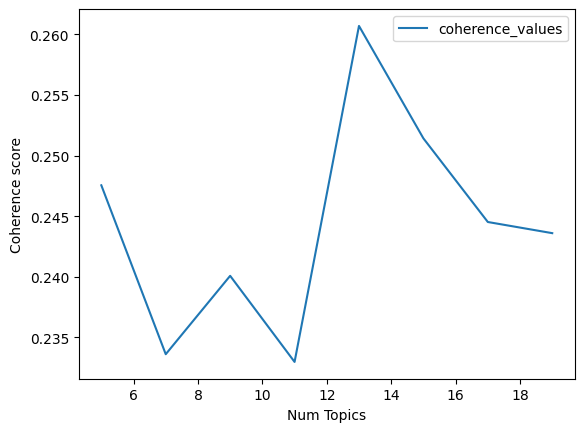

Optimal number of topics: 13


In [ ]:
import matplotlib.pyplot as plt

x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(["coherence_values"], loc='best')
plt.show()

optimal_model = model_list[coherence_values.index(max(coherence_values))]
optimal_num_topics = start + coherence_values.index(max(coherence_values)) * step

print(f'Optimal number of topics: {optimal_num_topics}')

In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

vis_data = gensimvis.prepare(optimal_model, corpus, dictionary)
pyLDAvis.display(vis_data)

# **Section 5: Perform Topic Modeling with BERTopic**
## This section uses BERTopic to perform topic modeling.

In [ ]:
from bertopic import BERTopic
combined_texts = [' '.join(text) for text in combined_preprocessed_texts]
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(combined_texts)
bertopic_results = topic_model.get_topic_info()

print("BERTopic Results:")
print(bertopic_results)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/skimage/util/dtype.py:27: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/hdbscan/hdbscan_.py:1170: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  self._all_finite = is_finite(X)


BERTopic Results:
   Topic  Count                      Name  \
0     -1     15     -1_like_im_get_people   
1      0     17  0_like_know_thing_people   
2      1     13      1_like_know_yeah_get   

                                      Representation  \
0  [like, im, get, people, thing, know, would, on...   
1  [like, know, thing, people, im, would, kind, r...   
2  [like, know, yeah, get, one, thats, im, uh, go...   

                                 Representative_Docs  
0  [thats hell title let talk verify guy legit th...  
1  [reality hit youre like away home im away frie...  
2  [hello everyone azeal vr_chat today two vetera...  


# **Section 6: Compare Results and Document**
## This section documents and compares the results of LDA and BERTopic.

In [ ]:
import pandas as pd

lda_topics = optimal_model.print_topics(num_words=10)
results = []

for idx, topic in lda_topics:
    words = topic.split(' + ')
    words = [word.split('*')[1].strip('"') for word in words]
    texts = [combined_texts[i] for i in range(len(topics)) if topics[i] == idx][:11]
    results.append([f"Topic {idx}", ', '.join(words), ' | '.join(texts)])


df_results = pd.DataFrame(results, columns=["Topic label with topic prevalence", "Most relevant words", "Two of the most exemplary text from VR chat (each video at least one)"])


print("LDA Topic Modeling Results:")
print(df_results)

print("\nBERTopic Results:")
print(bertopic_results)


LDA Topic Modeling Results:
   Topic label with topic prevalence  \
0                            Topic 0   
1                            Topic 1   
2                            Topic 2   
3                            Topic 3   
4                            Topic 4   
5                            Topic 5   
6                            Topic 6   
7                            Topic 7   
8                            Topic 8   
9                            Topic 9   
10                          Topic 10   
11                          Topic 11   
12                          Topic 12   

                                  Most relevant words  \
0   individual, would, agency, program, client, st...   
1   like, know, would, really, get, im, thing, peo...   
2   like, know, would, thing, uh, im, people, get,...   
3   like, yeah, know, one, get, thats, would, thin...   
4   like, know, thing, people, get, im, time, yeah...   
5   like, thing, people, uh, get, go, theyre, pers...   
6   like, kn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **Section 7: Perform Sentiment Analysis and Plot Sentiments**
##This section performs sentiment analysis and plots the results.

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

def sentiment_analysis(text):
    vader_analyzer = SentimentIntensityAnalyzer()
    vader_score = vader_analyzer.polarity_scores(text)
    textblob_score = TextBlob(text).sentiment
    return vader_score, textblob_score

combined_text = ' '.join([' '.join(text) for text in combined_preprocessed_texts])

vader_score, textblob_score = sentiment_analysis(combined_text)
print(f"VADER: {vader_score}")
print(f"TextBlob: {textblob_score}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


VADER: {'neg': 0.115, 'neu': 0.627, 'pos': 0.259, 'compound': 1.0}
TextBlob: Sentiment(polarity=0.08791589012547747, subjectivity=0.500563730427613)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


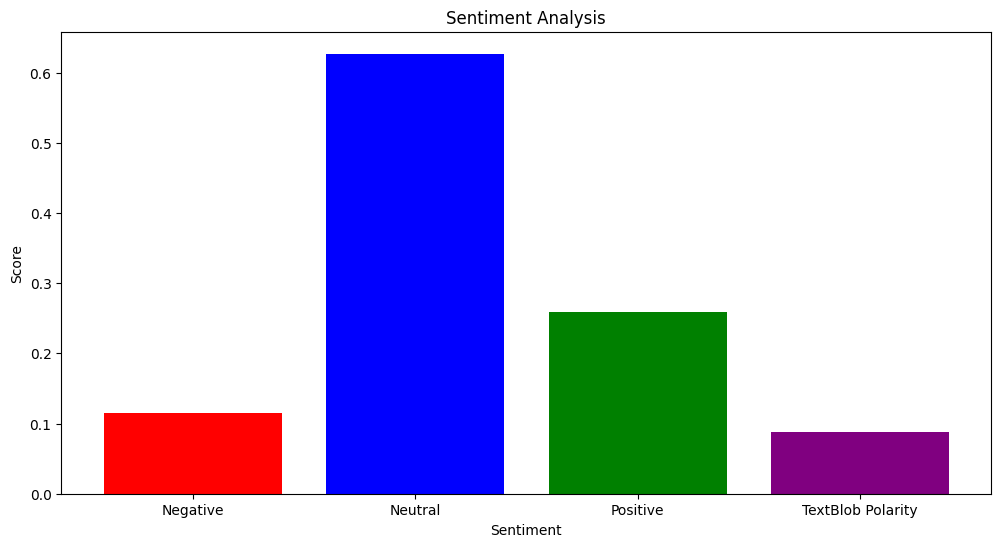

In [ ]:
import matplotlib.pyplot as plt

def plot_sentiments(vader_score, textblob_score):
    labels = ['Negative', 'Neutral', 'Positive', 'TextBlob Polarity']
    vader_values = [vader_score['neg'], vader_score['neu'], vader_score['pos'], textblob_score.polarity]

    plt.figure(figsize=(12, 6))
    plt.bar(labels, vader_values, color=['red', 'blue', 'green', 'purple'])
    plt.title('Sentiment Analysis')
    plt.xlabel('Sentiment')
    plt.ylabel('Score')
    plt.show()

plot_sentiments(vader_score, textblob_score)

# **Section 8: Perform Emotion Analysis and Plot Emotions**
## This section uses the NRC Emotion Lexicon file to perform emotion analysis and plot the results.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saving NRC-Emotion-Lexicon-Wordlevel-v0.92.txt to NRC-Emotion-Lexicon-Wordlevel-v0.92 (1).txt


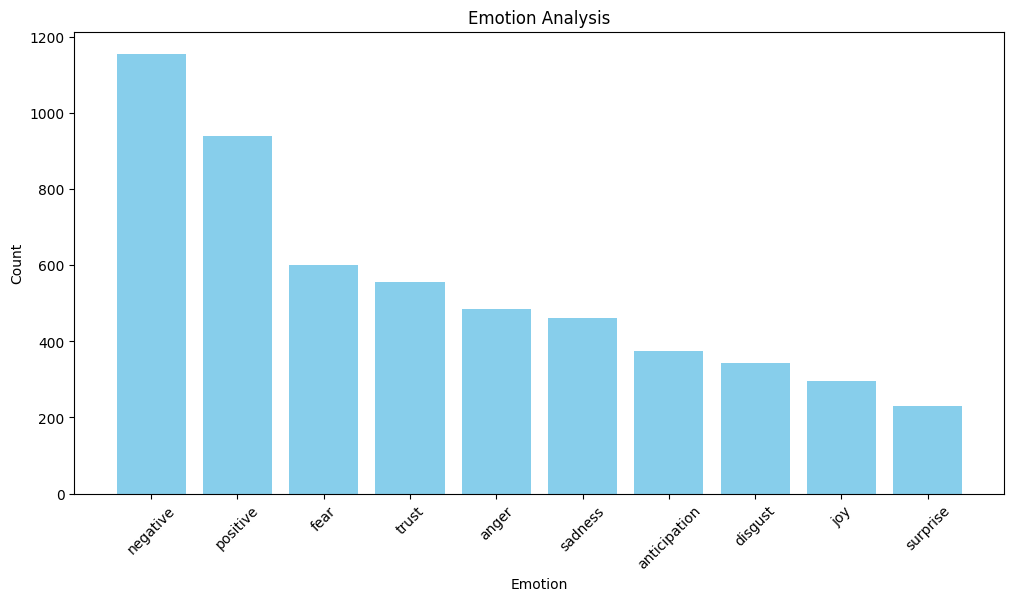

In [ ]:
import pandas as pd

uploaded_nrc = files.upload()
nrc_file_name = list(uploaded_nrc.keys())[0]

nrc = pd.read_csv(nrc_file_name,
                  names=["word", "emotion", "association"],
                  sep='\t')

nrc = nrc[nrc['association'] == 1]

def emotion_analysis(text):
    tokens = text.split()
    emotions = nrc[nrc['word'].isin(tokens)]
    emotion_counts = emotions['emotion'].value_counts().reset_index()
    emotion_counts.columns = ['emotion', 'count']
    return emotion_counts

emotion_counts = emotion_analysis(combined_text)

import matplotlib.pyplot as plt

def plot_emotions(emotion_counts):
    plt.figure(figsize=(12, 6))
    plt.bar(emotion_counts['emotion'], emotion_counts['count'], color='skyblue')
    plt.title('Emotion Analysis')
    plt.xlabel('Emotion')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

plot_emotions(emotion_counts)